In [1]:
import os
import subprocess
import ssl
from TBP import ThreeBodyEnv
from Zero_Sum_DDPG import setup_logger_kwargs
from Zero_Sum_DDPG import MLPActorCritic
import torch
import numpy as np
import pandas as pd

trajectory.csv already exists.
trajectory.csv already exists.
Directory 'utils' already exists.


2025-04-01 16:34:50.560508: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Directory 'model' already exists and is not empty.
File model/actor_cuda.pth already exists; skipping download.
File model/q_cuda.pth already exists; skipping download.


[JARVIS:04759] shmem: mmap: an error occurred while determining whether or not /var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T//ompi.JARVIS.502/jf.0/959512576/sm_segment.JARVIS.502.39310000.0 could be created.


In [2]:
if not os.path.isfile("Zero_Sum_DDPG.csv"):
    print("Downloading Zero_Sum_DDPG.csv...")
    !wget https://raw.githubusercontent.com/alibaniasad1999/master-thesis/refs/heads/main/Code/Python/Algorithms/DDPG/Zero-Sum-DDPG.py
else:
    print("Zero_Sum_DDPG.py already exists.")

--2025-04-01 16:34:57--  https://raw.githubusercontent.com/alibaniasad1999/master-thesis/refs/heads/main/Code/Python/Algorithms/DDPG/Zero-Sum-DDPG.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 198.18.0.120
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|198.18.0.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24493 (24K) [text/plain]
Saving to: ‘Zero-Sum-DDPG.py’

Zero-Sum-DDPG.py    100%[===================>]  23.92K  --.-KB/s    in 0.06s   

2025-04-01 16:34:58 (372 KB/s) - ‘Zero-Sum-DDPG.py’ saved [24493/24493]



In [3]:
# Define the model directory and file URLs
model_dir = 'model'
urls = [
    'https://github.com/alibaniasad1999/master-thesis/raw/main/Code/Python/TBP/DDPG/DG/model/actor_cuda.pth',
    'https://github.com/alibaniasad1999/master-thesis/raw/main/Code/Python/TBP/DDPG/DG/model/q_cuda.pth',
    'https://github.com/alibaniasad1999/master-thesis/raw/main/Code/Python/TBP/DDPG/DG/model/q_2_cuda.pth',
    'https://github.com/alibaniasad1999/master-thesis/raw/main/Code/Python/TBP/DDPG/DG/model/actor_2_cuda.pth'
]
ssl._create_default_https_context = ssl._create_unverified_context
# Check if the directory exists
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)
    print(f"Directory '{model_dir}' created.")
else:
    # Check if the directory is empty
    if not os.listdir(model_dir):
        print(f"Directory '{model_dir}' exists but is empty.")
    else:
        print(f"Directory '{model_dir}' already exists and is not empty.")

# Download the files
for url in urls:
    filename = os.path.join(model_dir, os.path.basename(url))
    if not os.path.isfile(filename):
        print(f"Downloading {url} to {filename}...")
        subprocess.run(['wget', '-P', model_dir, url])
    else:
        print(f"File {filename} already exists; skipping download.")

## Three body problem environment
## import trajectory data
df = pd.read_csv('trajectory.csv')
df.head()
# df to numpy array
data = df.to_numpy()
print(data.shape)
trajectory = np.delete(data, 2, 1)
trajectory = np.delete(trajectory, -1, 1)

Directory 'model' already exists and is not empty.
File model/actor_cuda.pth already exists; skipping download.
File model/q_cuda.pth already exists; skipping download.
File model/q_2_cuda.pth already exists; skipping download.
File model/actor_2_cuda.pth already exists; skipping download.
(9999, 6)


In [4]:
from Zero_Sum_DDPG import DG_DDPG

In [5]:
# Define variables directly
env = ThreeBodyEnv(trajectory)
hid = 32
l = 2
gamma = 0.99
seed = 0
epochs = 50
exp_name = 'ddpg'
steps_per_epoch_ = 30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid] * l)
states_array = []
logger_kwargs = setup_logger_kwargs(exp_name, seed)
reward_array = []
ddpg = DG_DDPG(lambda: ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), MLPActorCritic, ac_kwargs,
               seed_=seed, steps_per_epoch=steps_per_epoch_, epochs_=epochs, logger_kwargs_=logger_kwargs,
               device=device, batch_size=1024, start_steps=5000, update_after=1000, update_every=2000, first_player_epoch=50)

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/sanbox/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device":	"cpu",
    "env_fn":	"<function <lambda> at 0x116b7b1a0>",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "first_player_epoch":	50,
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/sanbox/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([0.1690])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<Zero_Sum_DDPG.DG_DDPG object at 0x123d3a450>":	{
      

[ 0.00999511  0.00060077  0.03130037 -0.00225319]
idx 0.01958 state 0.03294014247013221
too much error 🥲😱
second player was in the game
(9999, 6)


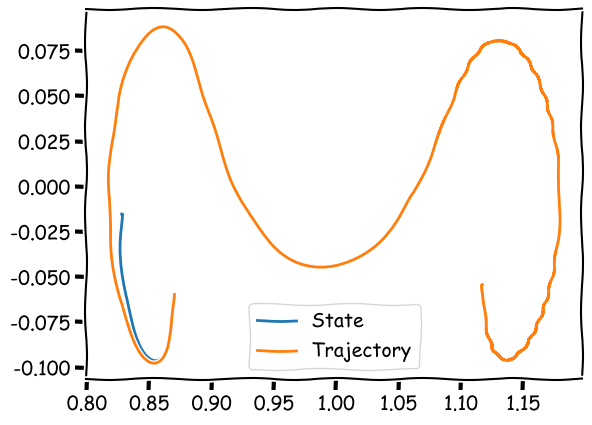

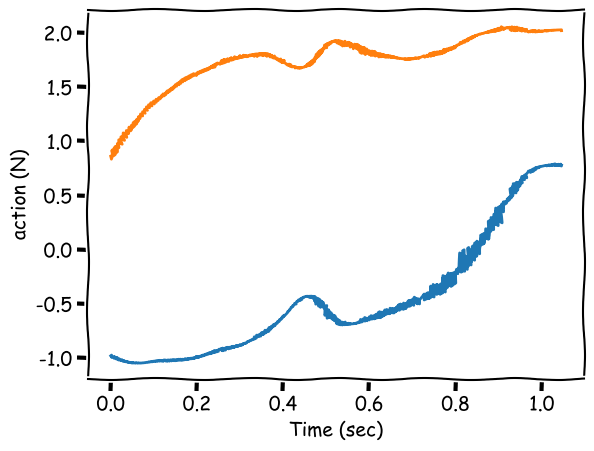

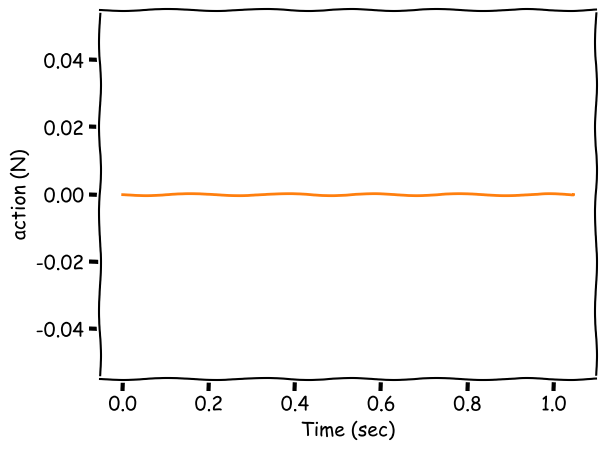

In [6]:
ddpg.test(second_player=False, fun_mode=True)

In [7]:
ddpg.load(from_device_to_load='cuda')
ddpg.load_2(from_device_to_load='cuda')

Model loaded successfully and device_ is cpu! 🥰😎
Model second loaded successfully and device_ is cpu! 🥰😎


done 🥺
second player was in the game
(9999, 6)


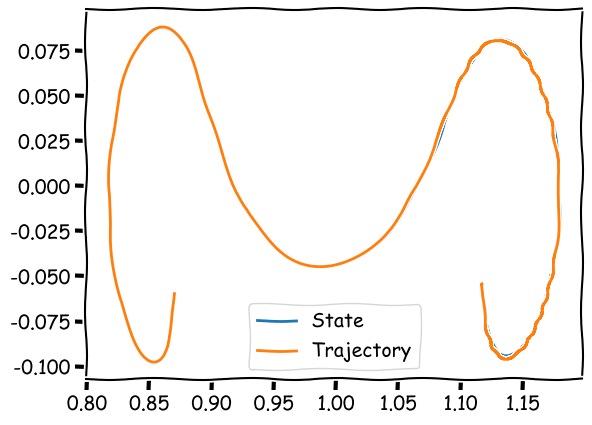

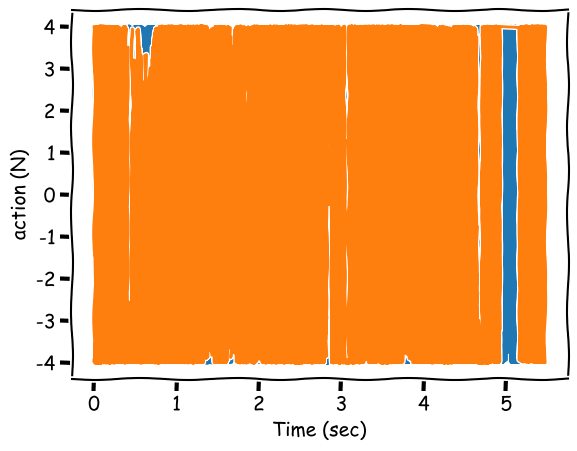

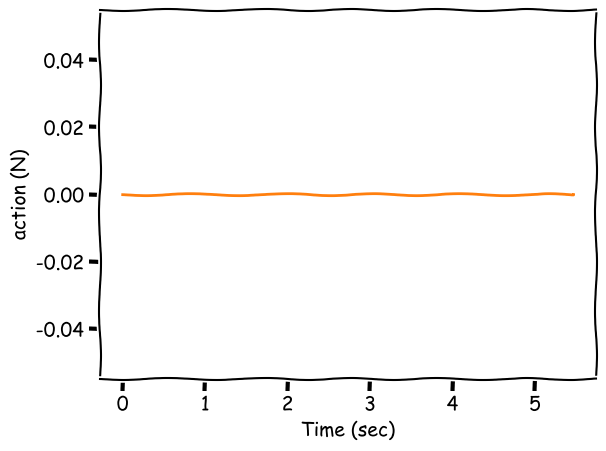

In [8]:
ddpg.test(second_player=False, fun_mode=True)

[-0.00875768  0.00486264 -0.02347211  0.01740604]
idx 0.05195 state 0.030890976594492872
too much error 🥲😱
second player was in the game
(9999, 6)


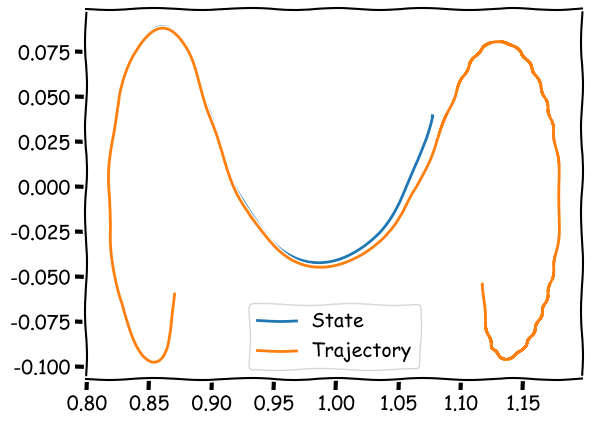

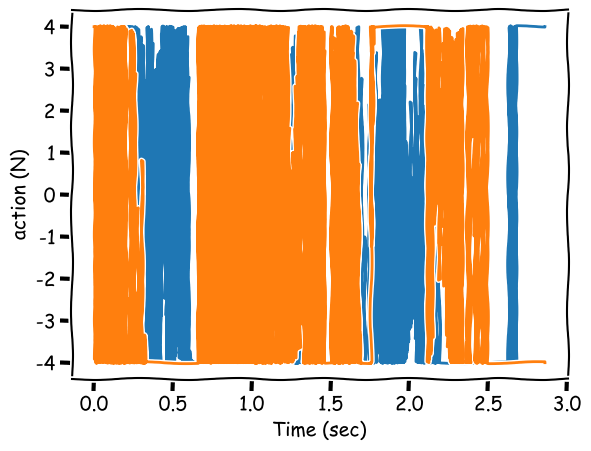

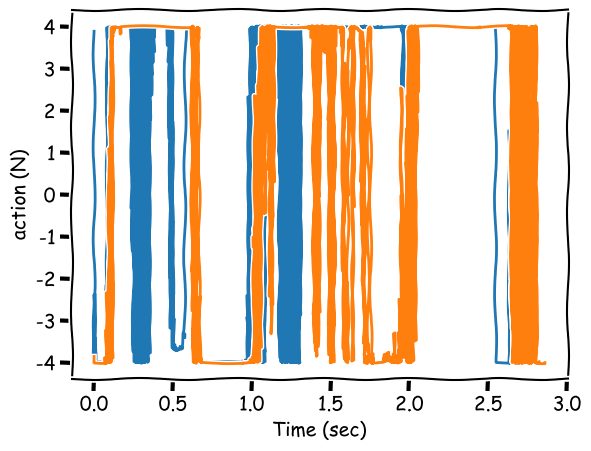

In [9]:
ddpg.test(second_player=True, fun_mode=True)